<h1>Результаты анализа отзывов по общественным местам.</h2>

---



In [14]:
from pymystem3 import Mystem
import pandas as pd
from string import punctuation 
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /root/.local/bin/mystem

--2022-01-27 09:25:57--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.245, 5.45.205.242, 5.45.205.243, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.245|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz [following]
--2022-01-27 09:25:58--  http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)... 5.45.205.221, 2a02:6b8::3:221
Connecting to cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)|5.45.205.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz.3’

mystem-3.0-linux3.1 100%[===================>]  15.70M 

In [2]:
import joblib
from keras.preprocessing.sequence import pad_sequences
import numpy as np


In [3]:
data = pd.read_excel('Classified_spaces.xlsx')
data1 = pd.read_excel('Classified_transport.xlsx')
data2 = pd.read_excel('Classified_in_spaces_2_classes.xlsx')


In [4]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

# Удаление знаков пунктуации из текста
def remove_punct(text):
    #  table = {33: '.', 34: ',', 35: '<', 36: '>', 37: '?', 38: '!', 39: '@', 40: '#', 41: '$', 42: '^', 43: '%', 44: '&', 45: '*', 46: '(', 47: ')', 58: '-', 59: '+', 60: '=', 61: '[', 62: ']', 63: '{', 64: '}', 91: ':', 92: ';', 93: '|', 94: '`', 95: '"', 96: '\'', 123: '/', 124: '~', 125: '№', 126: '\n'}
    #  return text.translate(table)
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
!pip install dostoevsky

     |████████████████████████████████| 68 kB 3.4 MB/s 
  Using cached pybind11-2.9.0-py2.py3-none-any.whl (210 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3126304 sha256=f7eadbd655ac6c0919a17c0b0fc3ea46bf1afd34dca7d12a9aff6b5b14b9547d
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [6]:
!python3 -m dostoevsky download fasttext-social-network-model

In [7]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
import pandas as pd

In [19]:
def sentiment_analysis_places(data):
    tokenizer = RegexTokenizer()
    model = FastTextSocialNetworkModel(tokenizer=tokenizer)
    try:
        messages = data['Review'].to_list()
    except:
        messages = data['review'].to_list()

    result = pd.DataFrame(columns=['Place', 'Class', 'Review', 'Positive', 'Negative', 'Neutral'])

    results = model.predict(messages)

    i = 0
    for message, sentiment in zip(messages, results):

        review = {'Place': data.iloc[i][1], 'Review': message, 'Class': data.iloc[i][3],
              'Positive' : sentiment['positive'], 'Negative' : sentiment['negative'], 'Neutral': sentiment['neutral']}

        #  print(review)
        result = result.append(review, ignore_index=True)
        i += 1
    return result


In [8]:
def sentiment_analysis_transport(data):
    tokenizer = RegexTokenizer()
    model = FastTextSocialNetworkModel(tokenizer=tokenizer)

    messages = data['Review'].to_list()

    result = pd.DataFrame(columns=['Class', 'Review', 'Positive', 'Negative', 'Neutral'])

    results = model.predict(messages)

    i = 0
    for message, sentiment in zip(messages, results):

        review = {'Review': message, 'Class': data.iloc[i][2],
              'Positive' : sentiment['positive'], 'Negative' : sentiment['negative'], 'Neutral': sentiment['neutral']}

        #  print(review)
        result = result.append(review, ignore_index=True)
        i += 1
    return result

In [21]:
sentiment_analysis_places(data).to_excel("Classified_sentimented_spaces.xlsx")

In [22]:
sentiment_analysis_places(data2).to_excel("Classified_sentimented_in_spaces.xlsx")

In [25]:
sentiment_analysis_transport(data1).to_excel("Classified_sentimented_transport.xlsx")

In [9]:
def preprocess_text(text, mystem, tokenizer, maxlen=100):
    text = text.lower()
    text = remove_punct(text)
    text = mystem.lemmatize(text)

    text = [token.strip() for token in text if token not in russian_stopwords and token != " " and token.strip() not in punctuation]
    text = ' '.join(text)

    final = tokenizer.texts_to_sequences([text])

    final = pad_sequences(final, padding='post', maxlen=maxlen)

    return final

In [10]:
transport_classes = {0 : 'Безопасность', 1 : 'Комфорт'}
spaces_2_classes = {0: 'Комфорт', 1: "Удовольствия"}
spaces_3_classes = {0 : 'Безопасность', 1 : 'Комфорт', 2: 'Удовольствия'}



In [16]:
def sentiment_analysis(message):
    tokenizer = RegexTokenizer()
    model = FastTextSocialNetworkModel(tokenizer=tokenizer)

    result = model.predict(message)
    return result

In [46]:
mystem = Mystem()

tokenizer = joblib.load("Tokenizer.joblib")

model_2_classes = joblib.load("text_classification_2_classes.joblib")
model_3_classes = joblib.load("text_classification_model.joblib")

review = input("Оценим отзыв про общественное пространство. Введите отзыв: ") 

processed_review = preprocess_text(review, mystem, tokenizer)
sentiment = sentiment_analysis([review])


p1 = spaces_2_classes[np.argmax(model_2_classes.predict(processed_review))]
p2 = spaces_3_classes[np.argmax(model_3_classes.predict(processed_review))]

pos = sentiment[0]['positive']
neg = sentiment[0]['negative']
neu = sentiment[0]['neutral']


print(f"Первая модель относит отзыв к классу {p1}. Вторая модель - {p2}. Анализ на эмоции показывает, что отзыв на {pos} позитивный, на {neg} негативный и на {neu} нейтральный")

Оценим отзыв про общественное пространство. Введите отзыв: Обожаю это место
Первая модель относит отзыв к классу Комфорт. Вторая модель - Комфорт. Анализ на эмоции показывает, что отзыв на 0.9993221759796143 позитивный, на 0.0009210511343553662 негативный и на 0.002482622629031539 нейтральный


<h1>Результаты анализа отзывов по транспорту.</h2>


---



In [22]:
mystem = Mystem()

tokenizer = joblib.load("Tokenizer_transport.joblib")

model = joblib.load("transport_classification1.joblib")


review = input("Оценим отзыв про транспорт. Введите отзыв: ") 

processed_review = preprocess_text(review, mystem, tokenizer)
sentiment = sentiment_analysis([review])


p = transport_classes[np.argmax(model.predict(processed_review))]

pos = sentiment[0]['positive']
neg = sentiment[0]['negative']
neu = sentiment[0]['neutral']


print(f"Модель относит отзыв к классу {p}. Анализ на эмоции показывает, что отзыв на {pos:.3f} позитивный, на {neg:.3f} негативный и на {neu:.3f} нейтральный")

Оценим отзыв про транспорт. Введите отзыв: Нарушает правила дорожного движения
Модель относит отзыв к классу Безопасность. Анализ на эмоции показывает, что отзыв на 0.005 позитивный, на 0.037 негативный и на 0.783 нейтральный


<h1>Нарисуем графики результатов</h1>

In [92]:
Out_spaces = pd.read_excel('Classified_sentimented_spaces.xlsx')
transport = pd.read_excel('Classified_sentimented_transport.xlsx')
in_spaces = pd.read_excel('Classified_sentimented_in_spaces.xlsx')

In [25]:
Out_spaces.head()

,Unnamed: 0,Place,Class,Review,Positive,Negative,Neutral
0,0,Этажи,У,"Интересное пространство. Много выставок, некот...",0.173298,0.100889,0.600198
1,1,Этажи,К,Всё по порядку.\nСамо здание это несколько эта...,0.069552,0.196836,0.554480
2,2,Этажи,У,Место не лишено художественного и социального ...,0.507822,0.222710,0.112805
3,3,Этажи,К,Замечательное место!!!\nБольшой выбор еды. Мно...,0.025967,0.148057,0.672342
4,4,Этажи,У,Любимое местечко питерской молодёжи.\nМагазинч...,0.164526,0.073706,0.399822


In [26]:
transport.head()

,Unnamed: 0,Class,Review,Positive,Negative,Neutral
0,0,Б,Гоняют приличных молодых людей с рюкзаками на ...,0.132974,0.341593,0.384922
1,1,Б,Я занимаюсь страйкболом и регулярно езжу на ме...,0.082707,0.300756,0.414909
2,2,К,"Газета,, Нью-Йорк тамс,, как - то опубликовала...",0.191943,0.160276,0.334599
3,3,К,"В вагонах станции объявляет ужасный голос, каж...",0.156115,0.206904,0.484390
4,4,К,"Пополняла подорожник сегодня на Электросиле, и...",0.106701,0.233716,0.320831


In [27]:
in_spaces.head()

,Unnamed: 0,Place,Class,Review,Positive,Negative,Neutral
0,0,Подписные издания,Комфорт,"Боже какое это прекрасное, изумительно прекрас...",0.692652,0.206904,0.028446
1,1,Подписные издания,Комфорт,"Отличное место, атмосферное, огромный выбор кн...",0.125933,0.063725,0.749097
2,2,Подписные издания,Комфорт,"Очень классный магазин, в котором можно все см...",0.281416,0.115971,0.384922
3,3,Подписные издания,Комфорт,"Уютное,красивое место с очень доброжелательны...",0.177821,0.085109,0.362979
4,4,Подписные издания,Комфорт,"Срочно заходите!\nКниги, подарки, открытки, на...",0.239359,0.025967,0.515630


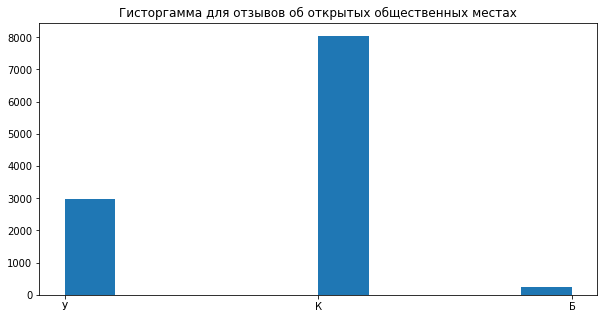

In [33]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title(f'Гисторгамма для отзывов об открытых общественных местах')
ax.hist(Out_spaces['Class'])
plt.show()

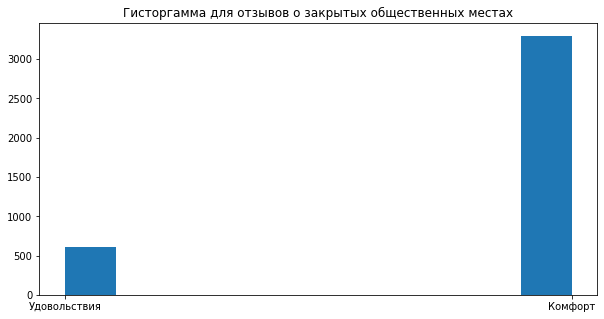

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title(f'Гисторгамма для отзывов о закрытых общественных местах')
ax.hist(in_spaces['Class'])
plt.show()

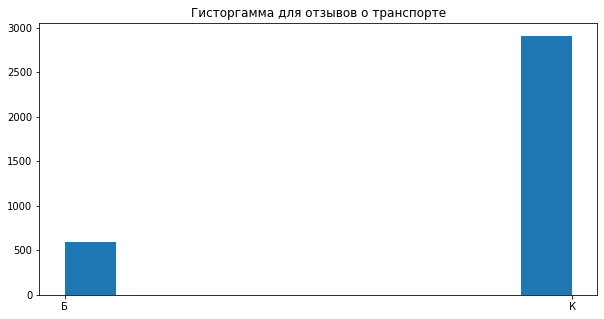

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title(f'Гисторгамма для отзывов о транспорте')
ax.hist(transport['Class'])
plt.show()

In [101]:
def draw_plot(data):
    data['Positive'] = np.round(data['Positive'], 2)
    data['Negative'] = np.round(data['Negative'], 2)
    data['Neutral'] = np.round(data['Neutral'], 2)

    data['Positive'] = data[data["Positive"] > 0.4]['Positive']
    data['Negative'] = data[data["Negative"] > 0.4]['Negative']
    data['Neutral'] = data[data["Neutral"] > 0.4]['Neutral']

    fig, ax = plt.subplots(3, 1, figsize=(30,20))

    sentiments = ['Positive', 'Negative', 'Neutral']

    for i, col in enumerate(sentiments):
        sns.countplot(x=data[col], hue=data['Class'], data=data[sentiments[i]], ax=ax[i])

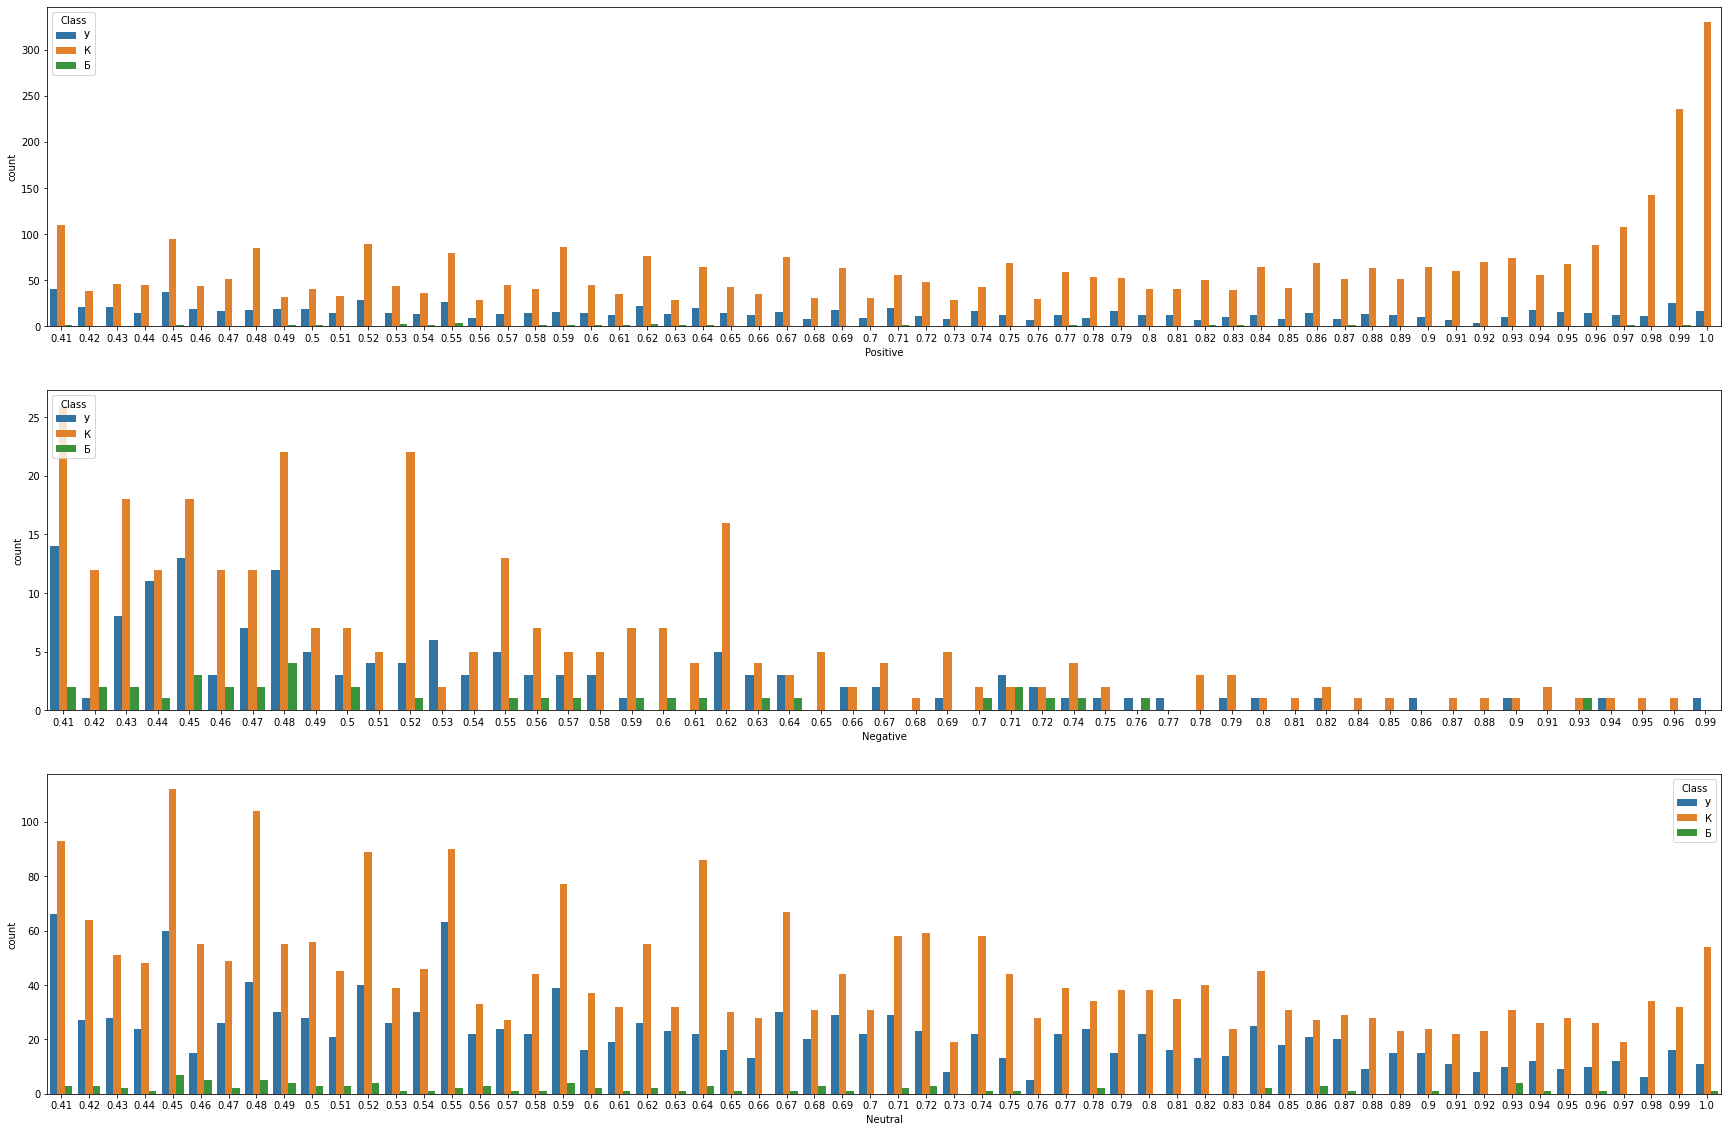

In [102]:
draw_plot(Out_spaces)

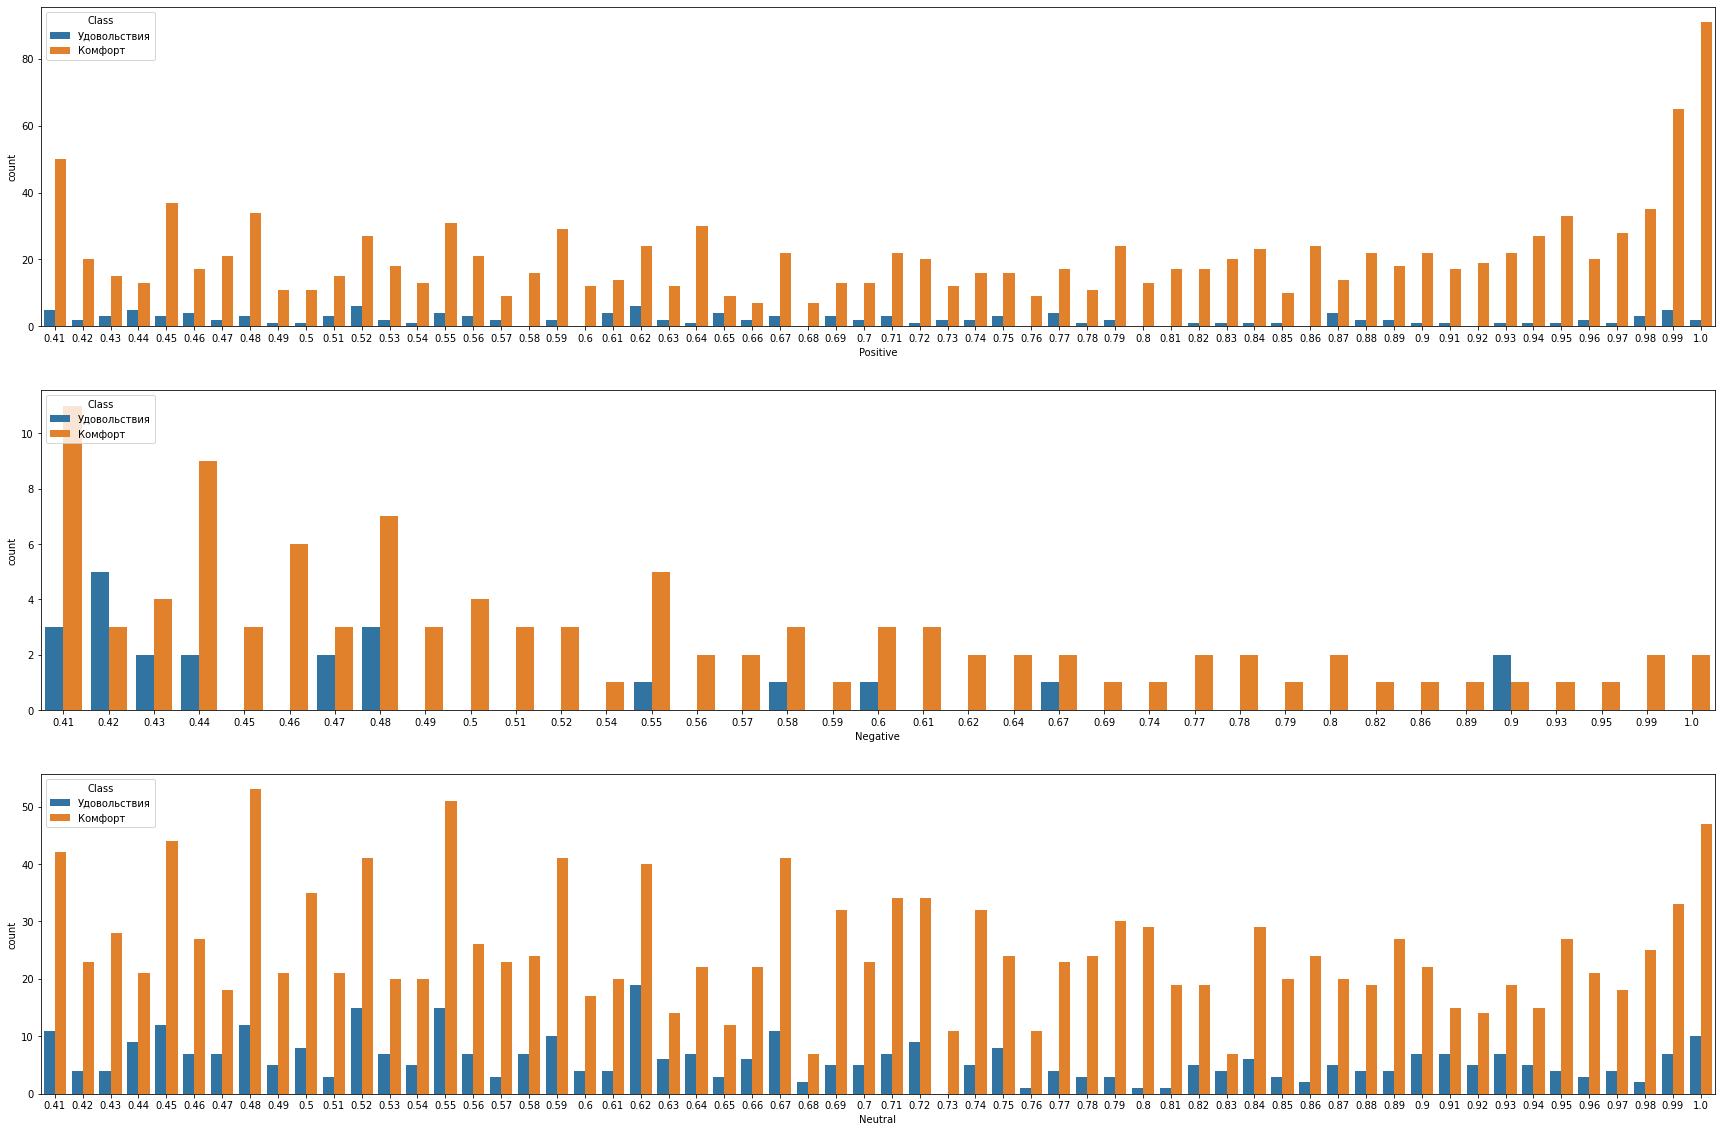

In [103]:
draw_plot(in_spaces)

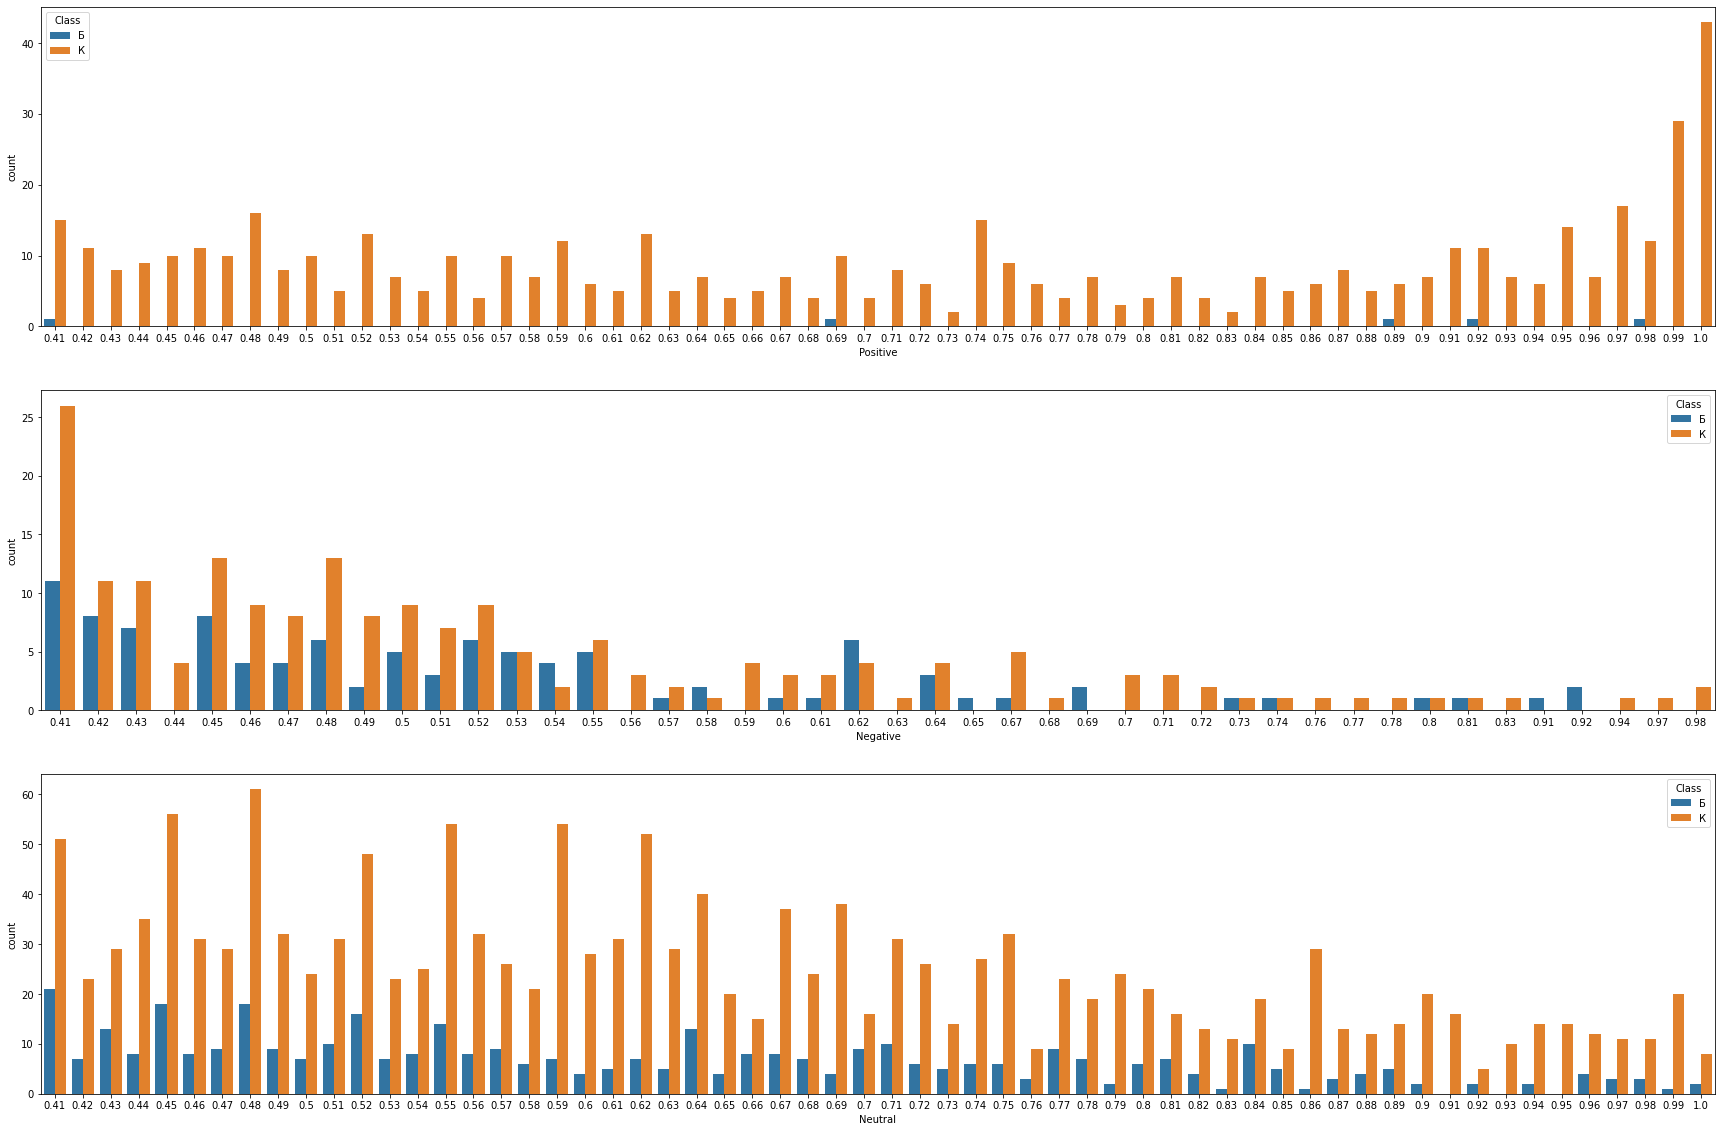

In [104]:
draw_plot(transport)